In [1]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

# Small data (with noise) and regression

The LinearRegressor is a robust linear regression model built on the Machine Gnostics framework. Unlike traditional statistical models that rely on probabilistic assumptions, this model uses algebraic and geometric structures to provide deterministic, resilient, and interpretable regression for real-world data.

Overview

The Machine Gnostics LinearRegressor is designed for robust regression tasks, especially where data may contain outliers, noise, or non-Gaussian distributions. It leverages the core principles of Mathematical Gnostics (MG) to deliver reliable results even in challenging scenarios.

Deterministic & Finite: No randomness or probability; all computations are reproducible.
Event-Level Modeling: Handles uncertainty and error at the level of individual data events.
Algebraic Inference: Utilizes gnostic algebra and error geometry for robust learning.
Resilient: Designed to be robust against outliers, corrupted data, and distributional shifts.
Flexible: Supports numpy arrays, pandas DataFrames, and pyspark DataFrames.
mlflow Integration: For experiment tracking and deployment.
Easy Model Persistence: Save and load models with joblib.

## Example 1 Linear Regression

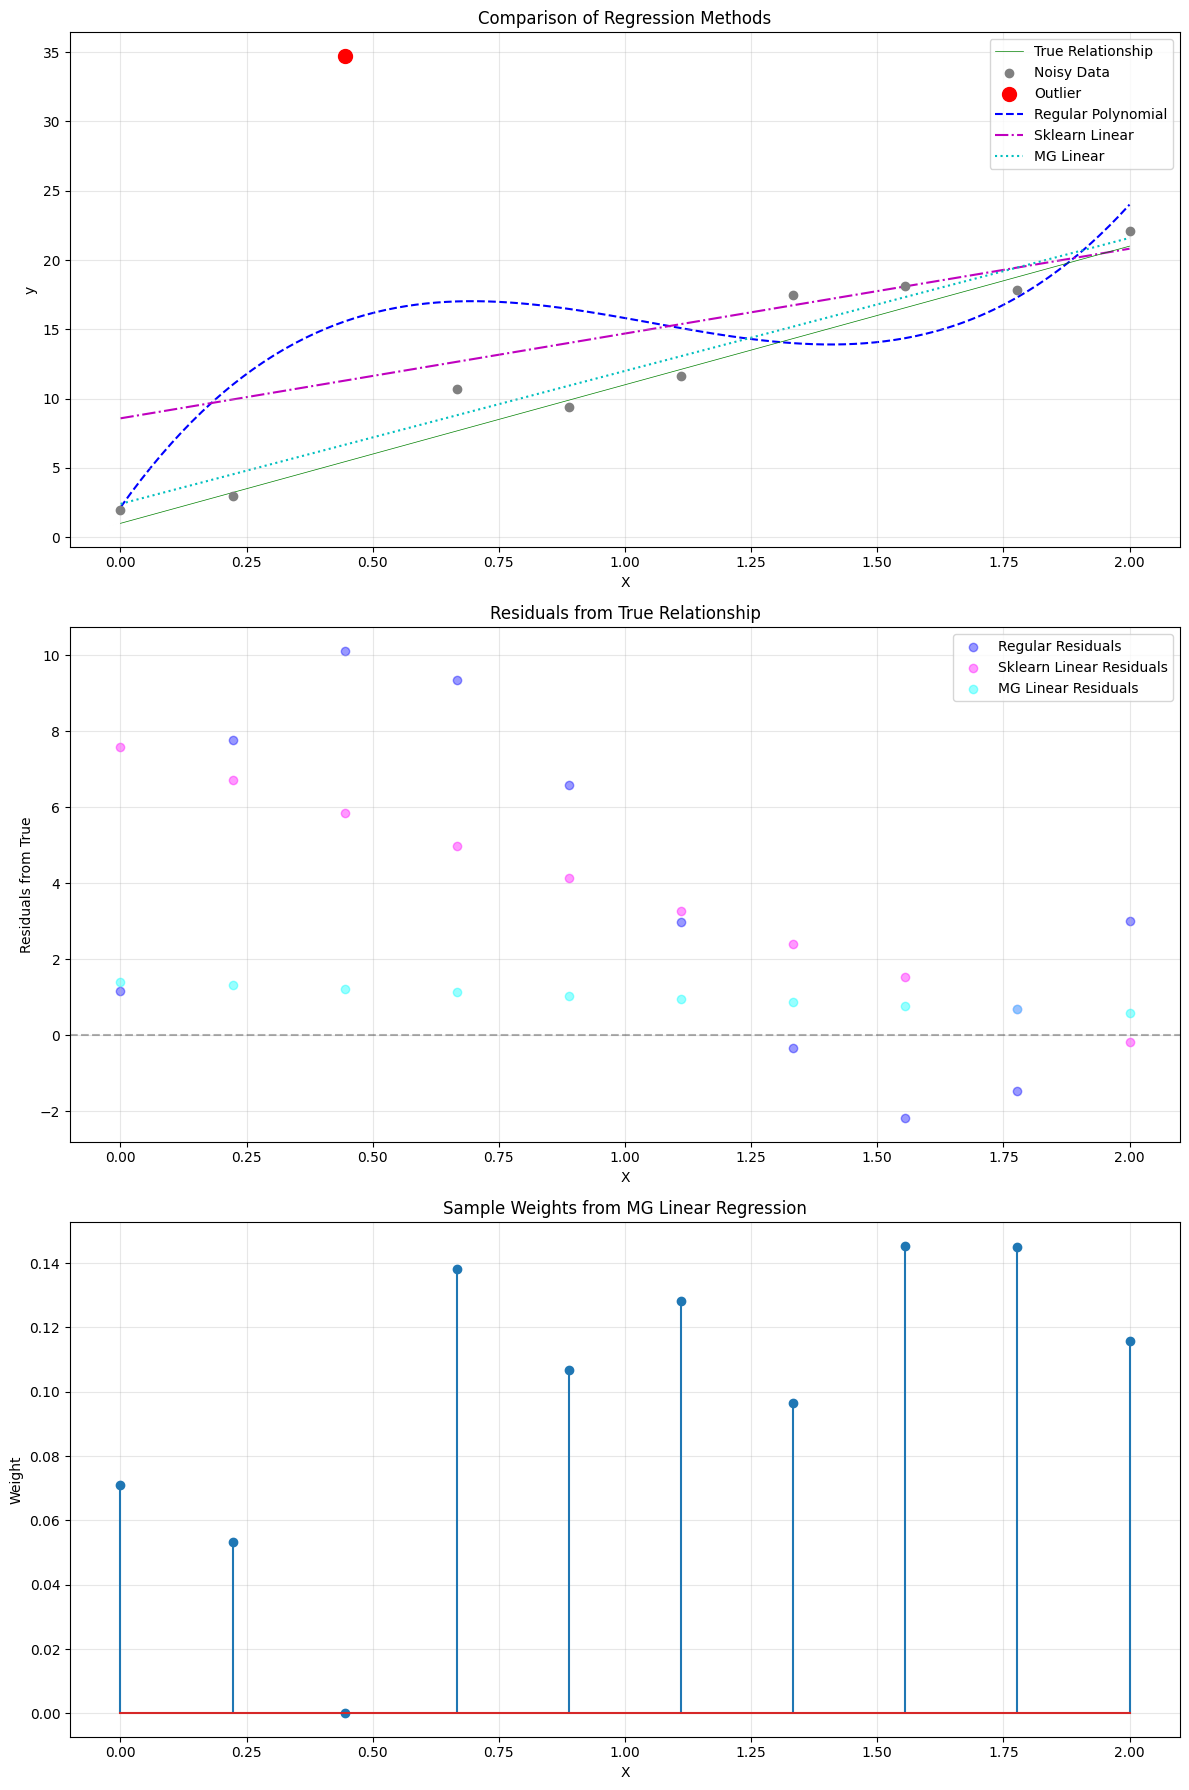

Coefficients:
True:           [Intercept: 1, Slope: 10]
Regular:        [  0.          51.13182115 -54.84299636  17.369313  ]
Sklearn Linear: [6.11971484]
MG Linear:      [2.40285216 9.59521403]

MSE against true relationship (excluding outliers):
Regular Polynomial: 38.5847
Sklearn Linear:     24.6826
MG Linear:          1.2263


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# machine gnostics imports
from machinegnostics.models.regression import LinearRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
y_noisy[2] = y_noisy[2] + 28.0  # Add outlier

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

degree = 3  # Using degree 1 for linear relationship

# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit sklearn LinearRegression (no polynomial features, just linear)
sk_model = LinearRegression()
sk_model.fit(X, y_noisy)
y_pred_sk = sk_model.predict(X)
y_pred_sk_test = sk_model.predict(X_test)

# Fit Machine Gnostics LinearRegressor (no polynomial features, just linear)
mg_linreg = LinearRegressor()
mg_linreg.fit(X, y_noisy)
y_pred_mg_linreg = mg_linreg.predict(X)
y_pred_mg_linreg_test = mg_linreg.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outlier', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_sk_test, 'm-.', label='Sklearn Linear', zorder=1)
ax1.plot(X_test, y_pred_mg_linreg_test, 'c:', label='MG Linear', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_sk = y_pred_sk - y_clean
residuals_mg_linreg = y_pred_mg_linreg - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.4)
ax2.scatter(X, residuals_sk, color='magenta', label='Sklearn Linear Residuals', alpha=0.4)
ax2.scatter(X, residuals_mg_linreg, color='cyan', label='MG Linear Residuals', alpha=0.4)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_linreg.weights, label='MG Linear Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from MG Linear Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:           [Intercept: 1, Slope: 10]")
print(f"Regular:        {poly_reg.named_steps['linearregression'].coef_}")
print(f"Sklearn Linear: {sk_model.coef_}")
print(f"MG Linear:      {mg_linreg.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_sk = np.mean((y_pred_sk[:-2] - y_clean[:-2])**2)
mse_mg_linreg = np.mean((y_pred_mg_linreg[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Sklearn Linear:     {mse_sk:.4f}")
print(f"MG Linear:          {mse_mg_linreg:.4f}")

## Example 2 - Polynomial Regression

model coeff: [ 3.33139017 -7.88149425 17.3218359 ]


/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_10039/3031427905.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend()


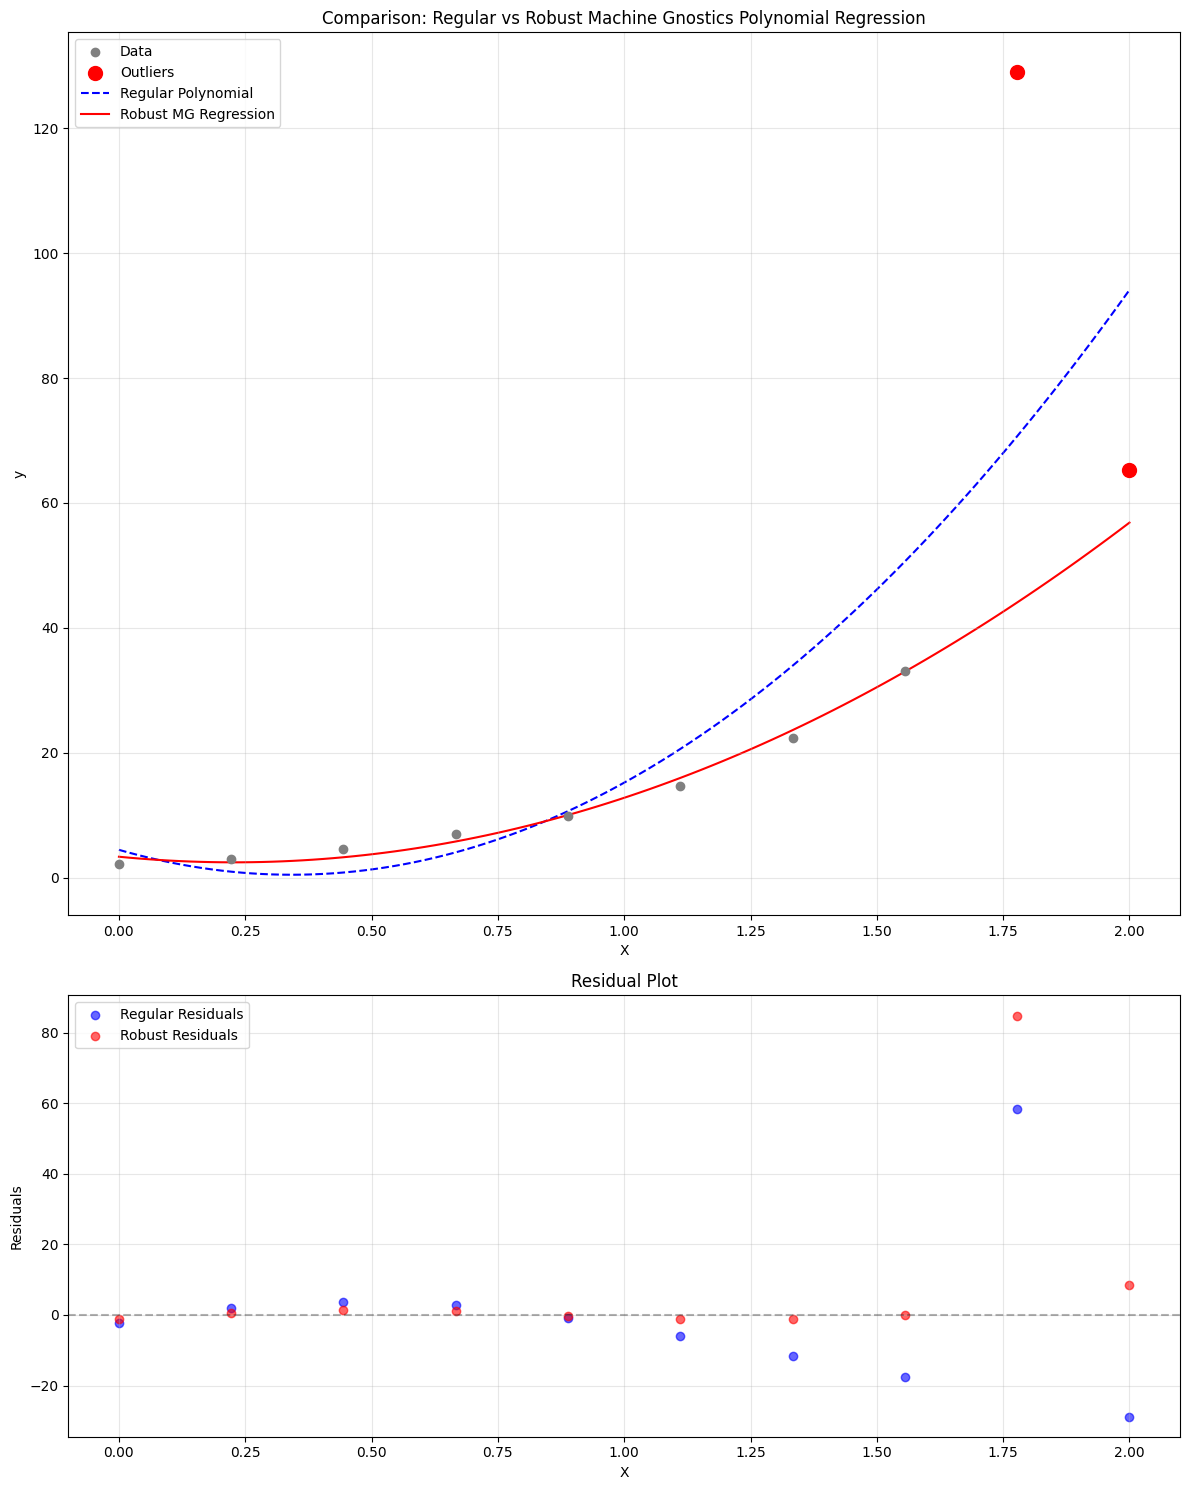

MSE (excluding outliers):
Regular Polynomial: 63.8383
Robust MG Regression: 1.0044

Max Absolute Residuals (excluding outliers):
Regular Polynomial: 17.5910
Robust MG Regression: 1.3305


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# machine gnostics imports
from machinegnostics.models.regression import PolynomialRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y = 2.0 * np.exp(1.8 * X.ravel()) + np.random.normal(0, 0.2, 10)
# y = 2*X +1
y[8:] += [80.0, -8.0]  # Add outliers
# Introduce outliers
# y[8:] += np.array([8.0, -80.0])  # one high outlier, one low outlier

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit regular polynomial regression
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y)
y_pred_regular = poly_reg.predict(X)  # Predict on training points for residuals
y_pred_regular_test = poly_reg.predict(X_test)  # Predict on test points for curve

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(degree=degree)
mg_model.fit(X, y.flatten())
y_pred_robust = mg_model.predict(X)  # Predict on training points for residuals
y_pred_robust_test = mg_model.predict(X_test)  # Predict on test points for curve
print(f'model coeff: {mg_model.coefficients}')

# Calculate residuals
residuals_regular = y - y_pred_regular
residuals_robust = y - y_pred_robust

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15), height_ratios=[2, 1])

# Plot regression curves
ax1.scatter(X, y, color='gray', label='Data', zorder=2)
ax1.scatter(X[8:], y[8:], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison: Regular vs Robust Machine Gnostics Polynomial Regression')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3.legend()
ax3.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print mean squared error for both methods (excluding outliers)
mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
print(f"MSE (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG Regression: {mse_robust:.4f}")

# Print max absolute residuals (excluding outliers)
max_resid_regular = np.max(np.abs(residuals_regular[:-2]))
max_resid_robust = np.max(np.abs(residuals_robust[:-2]))
print(f"\nMax Absolute Residuals (excluding outliers):")
print(f"Regular Polynomial: {max_resid_regular:.4f}")
print(f"Robust MG Regression: {max_resid_robust:.4f}")

In [24]:
mg_model = PolynomialRegressor(degree=2, mg_loss='hi', history=True)
mg_model.fit(X, y)
# Access training history
history = mg_model._history
print(history)

[{'iteration': 1, 'h_loss': np.float64(8.953296987281318), 'coefficients': array([  4.43699748, -23.32391267,  34.08548153]), 'rentropy': np.float64(0.5924292205148641), 'weights': array([0.14795983, 0.13976899, 0.1301301 , 0.13525477, 0.14794468,
       0.13615564, 0.09575336, 0.05339687, 0.00016209, 0.01347367])}, {'iteration': 2, 'h_loss': np.float64(9.066050741421657), 'coefficients': array([ 3.46936943, -8.85546713, 18.12299081]), 'rentropy': np.float64(0.19064429190096105), 'weights': array([1.47081794e-01, 1.41959339e-01, 1.30617236e-01, 1.36139506e-01,
       1.50264919e-01, 1.35698995e-01, 9.47802999e-02, 5.40153035e-02,
       1.25564990e-10, 9.44260713e-03])}, {'iteration': 3, 'h_loss': np.float64(9.06694791792327), 'coefficients': array([ 3.33139017, -7.88149425, 17.3218359 ]), 'rentropy': np.float64(0.1928915919163125), 'weights': array([1.46249257e-01, 1.43805396e-01, 1.31193088e-01, 1.37090006e-01,
       1.52042511e-01, 1.34944940e-01, 9.41896109e-02, 5.47179872e-02,
  

In [30]:
# cross validation example (optional)

from machinegnostics.models import CrossValidator
from machinegnostics.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

# normal mean squared error
def normal_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define cross-validator
cv = CrossValidator(model=mg_model, X=X, y=y, k=5, random_seed=42)

# Perform cross-validation with mean absolute error
cv_results = cv.evaluate(mean_absolute_error)
print("\nCross-Validation Results (Gnostics - Mean Absolute Error):")
for fold, mse in enumerate(cv_results, 1):
    print(f"Fold {fold}: {mse:.4f}")

# cross validation with root mean absolute error
cv_rmse = CrossValidator(model=mg_model, X=X, y=y, k=5, random_seed=42)
cv_results_rmse = cv_rmse.evaluate(root_mean_squared_error)
print("\nCross-Validation Results (Root Mean Squared Error):")
for fold, rmse in enumerate(cv_results_rmse, 1):
    print(f"Fold {fold}: {rmse:.4f}")

# cross validation with mean squared error
cv_mae = CrossValidator(model=mg_model, X=X, y=y, k=5, random_seed=42)
cv_results_mae = cv_mae.evaluate(mean_squared_error)
print("\nCross-Validation Results (Mean Squared Error):")
for fold, mae in enumerate(cv_results_mae, 1):
    print(f"Fold {fold}: {mae:.4f}")

# cross validation with normal mse
cv_normal = CrossValidator(model=mg_model, X=X, y=y, k=5, random_seed=42)
cv_results_normal = cv_normal.evaluate(normal_mse)
print("\nCross-Validation Results (Regular MSE):")
for fold, mse in enumerate(cv_results_normal, 1):
    print(f"Fold {fold}: {mse:.4f}")


Cross-Validation Results (Gnostics - Mean Absolute Error):
Fold 1: 3.3621
Fold 2: 3.2252
Fold 3: 2.5907
Fold 4: 19.3800
Fold 5: 80.4580

Cross-Validation Results (Root Mean Squared Error):
Fold 1: 3.3625
Fold 2: 3.2359
Fold 3: 2.5907
Fold 4: 19.4816
Fold 5: 80.8899

Cross-Validation Results (Mean Squared Error):
Fold 1: 11.3067
Fold 2: 10.4711
Fold 3: 6.7117
Fold 4: 379.5320
Fold 5: 6543.1827

Cross-Validation Results (Regular MSE):
Fold 1: 9.6567
Fold 2: 5.5576
Fold 3: 6.6326
Fold 4: 192.0267
Fold 5: 3308.9087
